In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
data1 = pd.read_csv("Resources//socio_health_deaths.csv")
data2 = pd.read_csv("Resources//socio_health_dependents.csv")
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [9]:
df1

,fips,state,county,number_of_deaths
0,01001,Alabama,Autauga,791.0
1,01003,Alabama,Baldwin,2967.0
2,01005,Alabama,Barbour,472.0
3,01007,Alabama,Bibb,471.0
4,01009,Alabama,Blount,1085.0
...,...,...,...,...
3139,56041,Wyoming,Uinta,256.0
3140,56043,Wyoming,Washakie,110.0
3141,56045,Wyoming,Weston,89.0
3142,KSC,Missouri,Kansas City,14267.0


In [10]:
df1 = df1[["fips", "number_of_deaths"]] 

In [13]:
df2 = df2[["fips", "limited_english"]]

In [15]:
df = df1.merge(df2, on="fips", how="left")

In [26]:
df.dtypes

fips                 object
number_of_deaths    float64
limited_english     float64
dtype: object

In [19]:
df.isnull().sum()

fips                  0
number_of_deaths    293
limited_english       0
dtype: int64

In [20]:
df.dropna()

,fips,number_of_deaths,limited_english
0,01001,791.0,0.535500
1,01003,2967.0,0.528200
2,01005,472.0,0.697900
3,01007,471.0,0.355300
4,01009,1085.0,0.748200
...,...,...,...
3139,56041,256.0,0.662500
3140,56043,110.0,0.464200
3141,56045,89.0,0.620200
3142,KSC,14267.0,0.669271


In [29]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 2].values.reshape(-1, 1)
lr = LinearRegression()

In [31]:
lr.fit(X, y)
y_pred = lr.predict(X)

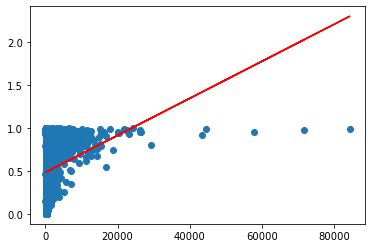

In [32]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.show()